In [ ]:
import re
import copy
import nltk
import pandas as pd
import numpy as np
import konlpy
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df_raw = pd.read_csv('./csv/traindf_musinsa_review_raw_240117.csv', sep=',', encoding='utf-8', index_col=0)
df_raw

product_names product_ids       user_names  user_ratings  \
0      [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE  Îâ¥ÎπÑ_cc4a349fa2d6           100   
1      [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE             ÏùÄÎπÑÌååÌåå           100   
2      [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE            Í±∞ÎàÑÏûÑÎãàÎã∑           100   
3      [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE      Îâ¥ÎπÑ_e3698f46           100   
4      [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE         Í≥†ÏÉùÎÅùÏóêÍ≥®Î≥ëÎÇúÎã§           100   
...                           ...         ...              ...           ...   
19708       ÌÖåÏù¥ÌçºÎìú Î∞¥Îî© ÏπòÎÖ∏ Ìå¨Ï∏† [BEIGE]  DFPT2104BE  Îâ¥ÎπÑ_dacde6304aba            60   
19709       ÌÖåÏù¥ÌçºÎìú Î∞¥Îî© ÏπòÎÖ∏ Ìå¨Ï∏† [BEIGE]  DFPT2104BE           SJ0314            60   
19710       ÌÖåÏù¥ÌçºÎìú Î∞¥Îî© ÏπòÎÖ∏ Ìå¨Ï∏† [BEIGE]  DFPT2104BE      Îâ¥ÎπÑ_1344cc7d            60   
19711       ÌÖåÏù¥ÌçºÎìú Î∞¥Îî© ÏπòÎÖ∏ Ìå¨Ï∏† [BEIGE]  DFPT2104BE          wwk1113            60   
19712       ÌÖåÏù¥ÌçºÎìú Î∞¥Îî© ÏπòÎÖ∏ Ìå¨Ï∏† [BEIGE]  DFPT2104BE            Î¨¥Ïá†Ï¢ÖÏïÑÎ¶¨            60   

                                            user_reviews  
0                                ÏÉâÏÉÅÎ¨¥ÎÇúÌïòÍ≥† Í∏∞Î≥∏Ïä§ÌÉÄÏùºÏùò Îß®Ìà¨Îß®ÏûÖÎãàÎã§Ìé∏Ìï¥Ïöî  
1      Í∏∞Î™®Ïù∏Ï§Ñ ÏïåÍ≥† Íµ¨ÏûÖÌñàÎäîÎç∞ Í∏∞Î™®Í∞Ä ÏïÑÎãàÎÑ§Ïöî. Í∑∏ÎüºÏóêÎèÑ ÎëêÍªòÍ∞êÎèÑÏûàÍ≥† Í∏∞Î™®Í∞Ä ÏïÑÎãàÎùº Î∂ÄÌï¥...  
2                            Ïò∑ ÏÉâÍ∞êÏù¥ Îî± ÏÉùÍ∞ÅÌïúÍ±∞Îùº ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ï∂îÏ≤úÌï©ÎãàÎã§!  
3      Ïò§Îπ† ÏÑ†Î¨ºÎ°ú Í∞ÑÎã®ÌïòÍ≤å ÏÉÄÎäîÎç∞ Ï†úÍ∞Ä ÌÉêÎÇòÏÑú ÏûÖÏñ¥Î≥¥Îãà ÏïÑÎ∞©Ìïú ÌïèÏóê Í¥úÏ∞ÆÍ∏∏Îûò Ïû†Íπê Ïñ¥Îîî ...  
4      Ïû¨ÏûÖÍ≥† ÎïåÎ¨∏Ïù∏ÏßÄ Î∞∞ÏÜ°Ïù¥ ÎßéÏù¥ ÎäêÎ†∏ÎäîÎç∞ ÏûÖÏñ¥Î≥¥Îãà ÏÜåÏû¨ÎÇò ÌïèÏù¥ÎÇò ÎÑàÎ¨¥ ÎßòÏóê Îì§Ïñ¥ÏÑú Ïûò ...  
...                                                  ...  
19708                        Ïùå...ÏùºÎã® Ï¢Ä ÏûëÎìúÎùºÍ≥†Ïöî ÌïúÎã®Í≥Ñ ÌÅ∞Í±∞ÏÇ¨ÏïºÌï†ÎìØÍµ¨Íµø  
19709                 Î∞¥Îî© Ïä¨ÎûôÏä®Îç∞ ÌóàÎ¶¨Í∞Ä ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßéÏù¥ ÏûëÍ≥† ÎßéÏù¥ ÎäòÎü¨Ï£ºÏßÑ Î™ªÌï¥Ïöî  
19710  ÏÉâÍ∞êÏùÄ ÌôîÎ©¥ÏóêÏÑú Î¥§ÎçòÍ±∞Î≥¥Îã§ ÏÇ¥Ïßù Îçî ÎàÑÎ†áÍ≥† Î∞ùÏùÄ ÎäêÎÇåÏù¥ ÏûàÏñ¥Ïöî. ÌóàÎ¶¨ Î≤®Ìä∏ÎÑ£ÎäîÎ∂ÄÎ∂ÑÏù¥...  
19711              ÌôîÎ©¥Î≥¥Îã§ Ï¢Ä Ïñ¥ÎëêÏõåÏöî Ïó∞Ìïú Î≤†Ïù¥ÏßÄÎäî ÏïÑÎãàÏóêÏöî Í∑∏ÎûòÎèÑ Ïûò ÏûÖÍ≤†ÏäµÎãàÎã§.  
19712  ÏÉùÍ∞ÅÎ≥¥Îã§ Í∏∞Ïû•Ïù¥ ÏÇ¥Ïßù Í∏∏Ïñ¥ÏÑú Ïï†Îß§Ìïú Í∏∞Ïû•Ïù¥ ÎêòÎ≤ÑÎ†∏Ïùå....Ïã†Î∞ú ÏúÑÎ°ú Ïù¥ÏÅòÍ≤å Ïò¨ÎùºÏò§Îäî...  

[19713 rows x 5 columns]

In [ ]:
df_raw.drop_duplicates(keep='first', inplace=True, ignore_index=True)
df_raw.shape

(19713, 5)

### Î†àÏù¥Î∏î Îã¨Í∏∞

In [ ]:
#Î∞±ÏóÖ
backup = df_raw.copy()
df = backup.copy()

In [ ]:
#train dataÏóê label Îã¨Í∏∞
df['label'] = ['pos' if r >= 80 else 'neu' if r < 80 and r >= 60 else 'neg' for r in df['user_ratings']]
df.head()

product_names product_ids       user_names  user_ratings  \
0  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE  Îâ¥ÎπÑ_cc4a349fa2d6           100   
1  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE             ÏùÄÎπÑÌååÌåå           100   
2  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE            Í±∞ÎàÑÏûÑÎãàÎã∑           100   
3  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE      Îâ¥ÎπÑ_e3698f46           100   
4  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE         Í≥†ÏÉùÎÅùÏóêÍ≥®Î≥ëÎÇúÎã§           100   

                                        user_reviews label  
0                            ÏÉâÏÉÅÎ¨¥ÎÇúÌïòÍ≥† Í∏∞Î≥∏Ïä§ÌÉÄÏùºÏùò Îß®Ìà¨Îß®ÏûÖÎãàÎã§Ìé∏Ìï¥Ïöî   pos  
1  Í∏∞Î™®Ïù∏Ï§Ñ ÏïåÍ≥† Íµ¨ÏûÖÌñàÎäîÎç∞ Í∏∞Î™®Í∞Ä ÏïÑÎãàÎÑ§Ïöî. Í∑∏ÎüºÏóêÎèÑ ÎëêÍªòÍ∞êÎèÑÏûàÍ≥† Í∏∞Î™®Í∞Ä ÏïÑÎãàÎùº Î∂ÄÌï¥...   pos  
2                        Ïò∑ ÏÉâÍ∞êÏù¥ Îî± ÏÉùÍ∞ÅÌïúÍ±∞Îùº ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ï∂îÏ≤úÌï©ÎãàÎã§!   pos  
3  Ïò§Îπ† ÏÑ†Î¨ºÎ°ú Í∞ÑÎã®ÌïòÍ≤å ÏÉÄÎäîÎç∞ Ï†úÍ∞Ä ÌÉêÎÇòÏÑú ÏûÖÏñ¥Î≥¥Îãà ÏïÑÎ∞©Ìïú ÌïèÏóê Í¥úÏ∞ÆÍ∏∏Îûò Ïû†Íπê Ïñ¥Îîî ...   pos  
4  Ïû¨ÏûÖÍ≥† ÎïåÎ¨∏Ïù∏ÏßÄ Î∞∞ÏÜ°Ïù¥ ÎßéÏù¥ ÎäêÎ†∏ÎäîÎç∞ ÏûÖÏñ¥Î≥¥Îãà ÏÜåÏû¨ÎÇò ÌïèÏù¥ÎÇò ÎÑàÎ¨¥ ÎßòÏóê Îì§Ïñ¥ÏÑú Ïûò ...   pos

### ÌÜ†ÌÅ∞Ìôî

- ÌòïÌÉúÏÜå Î∂ÑÏÑù
    - Okt.pos() Îäî [('ÏïÑÎ≤ÑÏßÄ', 'Noun'), ...] ÏãùÏúºÎ°ú Î∞òÌôòÌïúÎã§.
    - norm ÏòµÏÖò : Í∑∏ÎûòÏö¨„Öã„Öã -> Í∑∏ÎûòÏöî Ï≤òÎüº Î≥ÄÌôòÌï¥Ï£ºÎäî ÏòµÏÖò
    - stem ÏòµÏÖò : ÏõêÌòïÏùÑ Ï∞æÏïÑÏ£ºÎäî ÏòµÏÖò (Í∑∏ÎûòÏöî -> Í∑∏Î†áÎã§)

In [ ]:
Okt().pos(df.user_reviews[1], stem=True, norm=True, join=True)

['Í∏∞Î™®/Noun',
 'Ïù∏/Josa',
 'Ï§Ñ/Noun',
 'Ïïå/Noun',
 'Í≥†/Josa',
 'Íµ¨ÏûÖ/Noun',
 'ÌïòÎã§/Verb',
 'Í∏∞Î™®/Noun',
 'Í∞Ä/Josa',
 'ÏïÑÎãàÎã§/Adjective',
 './Punctuation',
 'Í∑∏Î†áÎã§/Adjective',
 'ÎëêÍªò/Noun',
 'Í∞êÎã§/Verb',
 'Í∏∞Î™®/Noun',
 'Í∞Ä/Josa',
 'ÏïÑÎãàÎã§/Adjective',
 'Î∂Ä/Noun',
 'Ìï¥Î≥¥Îã§/Verb',
 'ÏïäÎã§/Verb',
 'Ïò§ÌûàÎ†§/Noun',
 'Ïûò/VerbPrefix',
 'ÎêòÎã§/Verb',
 'Í∞ôÎã§/Adjective',
 '„Öé„Öé/KoreanParticle',
 'ÏÉÅÏ≤¥/Noun',
 'Î∞úÎã¨/Noun',
 'Ìòï/Suffix',
 'Ïù¥Îùº/Josa',
 'Ïò§Î≤ÑÌïè/Noun',
 'Ï¢ãÏïÑÌïòÎã§/Adjective',
 'ÎÑàÎ¨¥/Adverb',
 './Punctuation',
 'ÎßàÏùå/Noun',
 'Ïóê/Josa',
 'Îì§Îã§/Verb',
 'ÏÉâÍ∞ê/Noun',
 'ÎèÑ/Josa',
 'Ï¢ãÎã§/Adjective',
 'ÏãúÎ≥¥Î¶¨/Noun',
 'ÎèÑ/Josa',
 'Ïß±Ïß±ÌïòÎã§/Adjective',
 'Îßê/Noun',
 'ÏïÑ/Josa',
 'ÎÑ£Îã§/Verb',
 'Îπ†ÏßÄÎã§/Verb',
 'ÏóÜÎã§/Adjective',
 'Ï¢ãÎã§/Adjective',
 '„Öé/KoreanParticle']

In [ ]:
stopwords = ['Ïùò/Josa','Í∞Ä/Josa','Ïù¥/Josa','ÏùÄ/Josa','Îì§/Josa','Îäî/Josa','Ï¢Ä/Noun','Í±ç/Noun','Í≥º/Josa','ÎèÑ/Josa','Î•º/Josa','ÏúºÎ°ú/Josa','Ïóê/Josa','ÏôÄ/Josa','Ìïú/Noun','ÌïòÎã§/Verb','ÏùÑ/Josa',
             'ÏóêÏÑú/Josa','ÏóêÍ≤å/Josa', 'ÌïòÍ≥†/Josa', 'Ïù¥Îã§/Verb', './Punctuation']

In [ ]:
from tqdm.notebook import tqdm

def okt_pos_tokenizer(doc):
    result = []

    for sentence in tqdm(doc):
        tokenized_sentence = Okt().pos(sentence, norm=True, stem=True, join=True)
        stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        result.append(stopwords_removed_sentence)
    return result

df['token'] = okt_pos_tokenizer(df['user_reviews'])

  0%|          | 0/19713 [00:00<?, ?it/s]

In [ ]:
df.head()

product_names product_ids       user_names  user_ratings  \
0  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE  Îâ¥ÎπÑ_cc4a349fa2d6           100   
1  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE             ÏùÄÎπÑÌååÌåå           100   
2  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE            Í±∞ÎàÑÏûÑÎãàÎã∑           100   
3  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE      Îâ¥ÎπÑ_e3698f46           100   
4  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE         Í≥†ÏÉùÎÅùÏóêÍ≥®Î≥ëÎÇúÎã§           100   

                                        user_reviews label  \
0                            ÏÉâÏÉÅÎ¨¥ÎÇúÌïòÍ≥† Í∏∞Î≥∏Ïä§ÌÉÄÏùºÏùò Îß®Ìà¨Îß®ÏûÖÎãàÎã§Ìé∏Ìï¥Ïöî   pos   
1  Í∏∞Î™®Ïù∏Ï§Ñ ÏïåÍ≥† Íµ¨ÏûÖÌñàÎäîÎç∞ Í∏∞Î™®Í∞Ä ÏïÑÎãàÎÑ§Ïöî. Í∑∏ÎüºÏóêÎèÑ ÎëêÍªòÍ∞êÎèÑÏûàÍ≥† Í∏∞Î™®Í∞Ä ÏïÑÎãàÎùº Î∂ÄÌï¥...   pos   
2                        Ïò∑ ÏÉâÍ∞êÏù¥ Îî± ÏÉùÍ∞ÅÌïúÍ±∞Îùº ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ï∂îÏ≤úÌï©ÎãàÎã§!   pos   
3  Ïò§Îπ† ÏÑ†Î¨ºÎ°ú Í∞ÑÎã®ÌïòÍ≤å ÏÉÄÎäîÎç∞ Ï†úÍ∞Ä ÌÉêÎÇòÏÑú ÏûÖÏñ¥Î≥¥Îãà ÏïÑÎ∞©Ìïú ÌïèÏóê Í¥úÏ∞ÆÍ∏∏Îûò Ïû†Íπê Ïñ¥Îîî ...   pos   
4  Ïû¨ÏûÖÍ≥† ÎïåÎ¨∏Ïù∏ÏßÄ Î∞∞ÏÜ°Ïù¥ ÎßéÏù¥ ÎäêÎ†∏ÎäîÎç∞ ÏûÖÏñ¥Î≥¥Îãà ÏÜåÏû¨ÎÇò ÌïèÏù¥ÎÇò ÎÑàÎ¨¥ ÎßòÏóê Îì§Ïñ¥ÏÑú Ïûò ...   pos   

                                               token  
0  [ÏÉâÏÉÅ/Noun, Î¨¥ÎÇú/Noun, Í∏∞/Modifier, Î≥∏/Modifier, Ïä§ÌÉÄÏùº...  
1  [Í∏∞Î™®/Noun, Ïù∏/Josa, Ï§Ñ/Noun, Ïïå/Noun, Í≥†/Josa, Íµ¨ÏûÖ/N...  
2  [Ïò∑/Noun, ÏÉâÍ∞ê/Noun, Îî±/Adverb, ÏÉùÍ∞Å/Noun, Ìïú/Determi...  
3  [Ïò§Îπ†/Noun, ÏÑ†Î¨º/Noun, Î°ú/Josa, Í∞ÑÎã®ÌïòÎã§/Adjective, ÏÇ¨Îã§/...  
4  [Ïû¨/Noun, ÏûÖÎã§/Verb, ÎïåÎ¨∏/Noun, Ïù∏ÏßÄ/Josa, Î∞∞ÏÜ°/Noun, Îßé...

### Îì±Ïû• ÎπàÎèÑ Ï†ÅÏúºÎ©¥ ÏßÄÏö∞Í∏∞

- Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Ïùò ÎπàÎèÑÏàò Î®ºÏ†Ä ÌôïÏù∏ÌïòÍ≥†, ÎπàÎèÑÏàòÍ∞Ä Ï†ÅÏúºÎ©¥ ÏßÄÏõåÎ≤ÑÎ¶¨Í∏∞


In [ ]:
# ÏãúÎ¶¨Ï¶àÎ•º Î¶¨Ïä§Ìä∏Ìôî
tmp_token = []

for text in df.token:
    tmp_token += text

tmp_token

['ÏÉâÏÉÅ/Noun',
 'Î¨¥ÎÇú/Noun',
 'Í∏∞/Modifier',
 'Î≥∏/Modifier',
 'Ïä§ÌÉÄÏùº/Noun',
 'Îß®Ìà¨Îß®/Noun',
 'Ïù¥Îã§/Adjective',
 'Ìé∏ÌïòÎã§/Adjective',
 'Í∏∞Î™®/Noun',
 'Ïù∏/Josa',
 'Ï§Ñ/Noun',
 'Ïïå/Noun',
 'Í≥†/Josa',
 'Íµ¨ÏûÖ/Noun',
 'Í∏∞Î™®/Noun',
 'ÏïÑÎãàÎã§/Adjective',
 'Í∑∏Î†áÎã§/Adjective',
 'ÎëêÍªò/Noun',
 'Í∞êÎã§/Verb',
 'Í∏∞Î™®/Noun',
 'ÏïÑÎãàÎã§/Adjective',
 'Î∂Ä/Noun',
 'Ìï¥Î≥¥Îã§/Verb',
 'ÏïäÎã§/Verb',
 'Ïò§ÌûàÎ†§/Noun',
 'Ïûò/VerbPrefix',
 'ÎêòÎã§/Verb',
 'Í∞ôÎã§/Adjective',
 '„Öé„Öé/KoreanParticle',
 'ÏÉÅÏ≤¥/Noun',
 'Î∞úÎã¨/Noun',
 'Ìòï/Suffix',
 'Ïù¥Îùº/Josa',
 'Ïò§Î≤ÑÌïè/Noun',
 'Ï¢ãÏïÑÌïòÎã§/Adjective',
 'ÎÑàÎ¨¥/Adverb',
 'ÎßàÏùå/Noun',
 'Îì§Îã§/Verb',
 'ÏÉâÍ∞ê/Noun',
 'Ï¢ãÎã§/Adjective',
 'ÏãúÎ≥¥Î¶¨/Noun',
 'Ïß±Ïß±ÌïòÎã§/Adjective',
 'Îßê/Noun',
 'ÏïÑ/Josa',
 'ÎÑ£Îã§/Verb',
 'Îπ†ÏßÄÎã§/Verb',
 'ÏóÜÎã§/Adjective',
 'Ï¢ãÎã§/Adjective',
 '„Öé/KoreanParticle',
 'Ïò∑/Noun',
 'ÏÉâÍ∞ê/Noun',
 'Îî±/Adverb',
 'ÏÉùÍ∞Å/Noun',
 'Ìïú/Determiner',
 'Í±∞/Noun',
 'Îùº/Josa',
 'ÎÑàÎ¨¥/

In [ ]:
ko = nltk.Text(tmp_token)
ko_freq = ko.vocab()
ko_freq

FreqDist({'Ï¢ãÎã§/Adjective': 10164, 'ÏûÖÎã§/Verb': 8431, 'Í∞ôÎã§/Adjective': 5719, 'ÎÑàÎ¨¥/Adverb': 5146, 'ÏûàÎã§/Adjective': 3870, 'Ïù¥ÏÅòÎã§/Adjective': 3762, 'Ìïè/Noun': 3597, 'ÏÇ¨Ïù¥Ï¶à/Noun': 3416, 'ÏòàÏÅòÎã§/Adjective': 3329, 'Ïù¥Îã§/Adjective': 3305, ...})

In [ ]:
threshold = 3
total_cnt = len(ko_freq) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in ko_freq.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :',total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 11359
Îì±Ïû• ÎπàÎèÑÍ∞Ä 2Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 6560
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 57.75156263755612
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 2.352789995385541


- Îì±Ïû• ÎπàÎèÑÍ∞Ä threshold Í∞íÏù∏ 3Ìöå ÎØ∏Îßå. Ï¶â, 2Ìöå Ïù¥ÌïòÏù∏ Îã®Ïñ¥Îì§ÏùÄ Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Î¨¥Î†§ Ï†àÎ∞ò Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄ.
- Ïã§Ï†úÎ°ú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Îì±Ïû• ÎπàÎèÑÎ°ú Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ëÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îß§Ïö∞ Ï†ÅÏùÄ ÏàòÏπòÏù∏ 2.35%.
- Îì±Ïû• ÎπàÎèÑÍ∞Ä 2Ìöå Ïù¥ÌïòÏù∏ Îã®Ïñ¥Îì§ÏùÄ Ï†úÍ±∞

In [ ]:
remove_token = []

for k, v in ko_freq.items():
    if v < 3:
        remove_token.append(k)

remove_token[:3]

['Îç∞ÏΩî/Noun', 'ÏÑúÎ¨¥/Noun', 'Ïò¥ÌÉù/Noun']

In [ ]:
stopwords += remove_token

In [ ]:
df['token'] = okt_pos_tokenizer(df['user_reviews'])

  0%|          | 0/19713 [00:00<?, ?it/s]

### Vectorizer + MultinomialNB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df['vect'] = [' '.join(text) for text in df.token]

In [ ]:
df.head()

product_names product_ids       user_names  user_ratings  \
0  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE  Îâ¥ÎπÑ_cc4a349fa2d6           100   
1  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE             ÏùÄÎπÑÌååÌåå           100   
2  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE            Í±∞ÎàÑÏûÑÎãàÎã∑           100   
3  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE      Îâ¥ÎπÑ_e3698f46           100   
4  [Í∏∞Î™®Î≤ÑÏ†ÑÏ∂îÍ∞Ä]ÏãúÍ∑∏ÎãàÏ≤ò Ïò§Î≤ÑÌïè Îß®Ìà¨Îß®(4col)    P00000NE         Í≥†ÏÉùÎÅùÏóêÍ≥®Î≥ëÎÇúÎã§           100   

                                        user_reviews label  \
0                            ÏÉâÏÉÅÎ¨¥ÎÇúÌïòÍ≥† Í∏∞Î≥∏Ïä§ÌÉÄÏùºÏùò Îß®Ìà¨Îß®ÏûÖÎãàÎã§Ìé∏Ìï¥Ïöî   pos   
1  Í∏∞Î™®Ïù∏Ï§Ñ ÏïåÍ≥† Íµ¨ÏûÖÌñàÎäîÎç∞ Í∏∞Î™®Í∞Ä ÏïÑÎãàÎÑ§Ïöî. Í∑∏ÎüºÏóêÎèÑ ÎëêÍªòÍ∞êÎèÑÏûàÍ≥† Í∏∞Î™®Í∞Ä ÏïÑÎãàÎùº Î∂ÄÌï¥...   pos   
2                        Ïò∑ ÏÉâÍ∞êÏù¥ Îî± ÏÉùÍ∞ÅÌïúÍ±∞Îùº ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ï∂îÏ≤úÌï©ÎãàÎã§!   pos   
3  Ïò§Îπ† ÏÑ†Î¨ºÎ°ú Í∞ÑÎã®ÌïòÍ≤å ÏÉÄÎäîÎç∞ Ï†úÍ∞Ä ÌÉêÎÇòÏÑú ÏûÖÏñ¥Î≥¥Îãà ÏïÑÎ∞©Ìïú ÌïèÏóê Í¥úÏ∞ÆÍ∏∏Îûò Ïû†Íπê Ïñ¥Îîî ...   pos   
4  Ïû¨ÏûÖÍ≥† ÎïåÎ¨∏Ïù∏ÏßÄ Î∞∞ÏÜ°Ïù¥ ÎßéÏù¥ ÎäêÎ†∏ÎäîÎç∞ ÏûÖÏñ¥Î≥¥Îãà ÏÜåÏû¨ÎÇò ÌïèÏù¥ÎÇò ÎÑàÎ¨¥ ÎßòÏóê Îì§Ïñ¥ÏÑú Ïûò ...   pos   

                                               token  \
0  [ÏÉâÏÉÅ/Noun, Î¨¥ÎÇú/Noun, Í∏∞/Modifier, Î≥∏/Modifier, Ïä§ÌÉÄÏùº...   
1  [Í∏∞Î™®/Noun, Ïù∏/Josa, Ï§Ñ/Noun, Ïïå/Noun, Í≥†/Josa, Íµ¨ÏûÖ/N...   
2  [Ïò∑/Noun, ÏÉâÍ∞ê/Noun, Îî±/Adverb, ÏÉùÍ∞Å/Noun, Ìïú/Determi...   
3  [Ïò§Îπ†/Noun, ÏÑ†Î¨º/Noun, Î°ú/Josa, Í∞ÑÎã®ÌïòÎã§/Adjective, ÏÇ¨Îã§/...   
4  [Ïû¨/Noun, ÏûÖÎã§/Verb, ÎïåÎ¨∏/Noun, Ïù∏ÏßÄ/Josa, Î∞∞ÏÜ°/Noun, Îßé...   

                                                vect  
0  ÏÉâÏÉÅ/Noun Î¨¥ÎÇú/Noun Í∏∞/Modifier Î≥∏/Modifier Ïä§ÌÉÄÏùº/Noun...  
1  Í∏∞Î™®/Noun Ïù∏/Josa Ï§Ñ/Noun Ïïå/Noun Í≥†/Josa Íµ¨ÏûÖ/Noun Í∏∞Î™®...  
2  Ïò∑/Noun ÏÉâÍ∞ê/Noun Îî±/Adverb ÏÉùÍ∞Å/Noun Ìïú/Determiner Í±∞...  
3  Ïò§Îπ†/Noun ÏÑ†Î¨º/Noun Î°ú/Josa Í∞ÑÎã®ÌïòÎã§/Adjective ÏÇ¨Îã§/Verb ...  
4  Ïû¨/Noun ÏûÖÎã§/Verb ÎïåÎ¨∏/Noun Ïù∏ÏßÄ/Josa Î∞∞ÏÜ°/Noun ÎßéÏù¥/Adve...

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['vect'], df['label'], test_size=0.2, random_state=13)

# Convert the text data into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
multinomialNB = MultinomialNB()
multinomialNB.fit(X_train_vectorized, y_train)

# Make predictions on the test set
pred = multinomialNB.predict(X_test_vectorized)
pred_proba = multinomialNB.predict_proba(X_test_vectorized
                                         )
# Evaluate the model
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, pred))

Accuracy: 0.83
              precision    recall  f1-score   support

         neg       0.85      0.11      0.19       276
         neu       0.00      0.00      0.00       416
         pos       0.83      1.00      0.91      3251

    accuracy                           0.83      3943
   macro avg       0.56      0.37      0.37      3943
weighted avg       0.75      0.83      0.76      3943



- Îã§Î•∏ Ï†êÏàò ÌôïÏù∏ÌïòÍ∏∞
- Îã§Ï§ëÌÅ¥ÎûòÏä§Ïùò f1_scoreÏùò ÌèâÍ∑†
    - ÎùºÎ≤®Ïùò Ï§ëÏöîÎèÑÏóê Îî∞Îùº Ïñ¥Îñ§ ÏßÄÌëúÎ•º ÏÑ†ÌÉùÌï†ÏßÄÍ∞Ä Îã¨ÎùºÏßÑÎã§.
    - Î™®Îì† ÎùºÎ≤®Ïù¥ Ïú†ÏÇ¨Ìïú Ï§ëÏöîÎèÑÎ•º Í∞ÄÏßÑÎã§Î©¥ macro average Í∞íÏùÑ Ï∞∏Í≥†ÌïòÍ≥†
    - ÏÉòÌîåÏù¥ ÎßéÏùÄ ÎùºÎ≤®Ïóê Ï§ëÏöîÎèÑÎ•º ÎëêÍ≥† Ïã∂Îã§Î©¥ weighted average Í∞íÏùÑ Ï∞∏Í≥†ÌïòÎ©¥ ÎêúÎã§
    - Í∑∏Î¶¨Í≥† ÎùºÎ≤®Ïóê ÏÉÅÍ¥ÄÏóÜÏù¥ Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ≥† Ïã∂ÏùÑ ÎïåÎäî micro average, Ï¶â accuracy Î•º ÌôúÏö©ÌïòÎ©¥ ÎêúÎã§.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def get_clf_evalscore(y_test, pred, pred_proba):
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='macro')
    pre = precision_score(y_test, pred, average='macro')
    rec = recall_score(y_test, pred, average='macro')
    # auc = roc_auc_score(y_test, pred_proba[:,1], multi_class='ovr')   #Îã§Î¶Ñ. Ï£ºÏùò

    return acc, pre, rec, f1

from sklearn.metrics import confusion_matrix

def print_clf_evalmatrix(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, rec, f1 = get_clf_evalscore(y_test, pred, pred_proba)

    print('==> Confusion Matrix')
    print(confusion)
    print('=====================')
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}'.format(rec, f1))

In [ ]:
print_clf_evalmatrix(y_test, pred, pred_proba)

==> Confusion Matrix
[[  29    0  247]
 [   5    0  411]
 [   0    1 3250]]
Accuracy: 0.8316, Precision: 0.5615
Recall: 0.3683, F1: 0.3650


### Oversampling

<Axes: xlabel='label'>

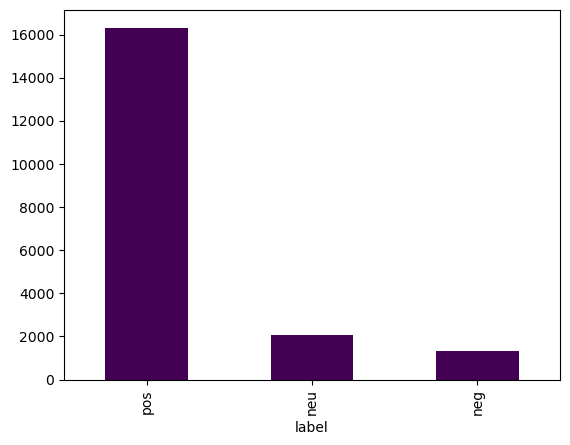

In [ ]:
df['label'].value_counts().plot(kind = 'bar', colormap='viridis')

- Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§. OversamplingÏúºÎ°ú ÎπÑÏú®ÏùÑ ÎßûÏ∂∞Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏñ¥ Î≥¥Ïù∏Îã§.

In [ ]:
# SMOTE Ï†ÅÏö©
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_vectorized_over, y_train_over = smote.fit_resample(X_train_vectorized, y_train)   #Ìä∏Î†àÏù∏Îßå Í±¥ÎìúÎ¶º

# ÏñºÎßàÎÇò Î∂àÏñ¥ÎÇ¨ÎäîÏßÄ ÌôïÏù∏
X_train_vectorized.shape, y_train.shape, X_train_vectorized_over.shape, y_train_over.shape

((15770, 3831), (15770,), (39231, 3831), (39231,))

In [ ]:
print(np.unique(y_train_over, return_counts=True))

(array(['neg', 'neu', 'pos'], dtype=object), array([13077, 13077, 13077], dtype=int64))


### Îã§Ïãú MultinomialNB

In [ ]:
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train_vectorized_over, y_train_over)

# Make predictions on the test set
pred = mnb_clf.predict(X_test_vectorized)
pred_proba = mnb_clf.predict_proba(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, pred))

Accuracy: 0.72
              precision    recall  f1-score   support

         neg       0.45      0.62      0.52       276
         neu       0.21      0.44      0.28       416
         pos       0.93      0.77      0.84      3251

    accuracy                           0.72      3943
   macro avg       0.53      0.61      0.55      3943
weighted avg       0.82      0.72      0.76      3943



In [ ]:
print_clf_evalmatrix(y_test, pred, pred_proba)

==> Confusion Matrix
[[ 172   75   29]
 [  65  182  169]
 [ 147  616 2488]]
Accuracy: 0.7208, Precision: 0.5276
Recall: 0.6087, F1: 0.5472


### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000,
                          num_leaves=64, boost_from_average=False)

lgbm_clf.fit(X_train_vectorized_over, y_train_over)
lgbm_pred = lgbm_clf.predict(X_test_vectorized)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test_vectorized)

print_clf_evalmatrix(y_test, lgbm_pred, lgbm_pred_proba)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 197001
[LightGBM] [Info] Number of data points in the train set: 39231, number of used features: 2380
==> Confusion Matrix
[[ 127   41  108]
 [  38   62  316]
 [  33   84 3134]]
Accuracy: 0.8428, Precision: 0.6179
Recall: 0.5244, F1: 0.5540


### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train_vectorized_over, y_train_over)
lr_pred = lr_clf.predict(X_test_vectorized)
lr_pred_proba = lr_clf.predict_proba(X_test_vectorized)

print_clf_evalmatrix(y_test, lr_pred, lr_pred_proba)

==> Confusion Matrix
[[ 183   62   31]
 [  77  152  187]
 [ 139  511 2601]]
Accuracy: 0.7446, Precision: 0.5303
Recall: 0.6095, F1: 0.5552


- Î™®Îç∏ Î≥ÑÎ°ú PrecisionÍ≥º RecallÏóêÏÑú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê AccuracyÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ LightGBMÏúºÎ°ú ÏÇ¨Ïö©.

### GridSearchCV

- ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î†§ÏÑú ÏùºÎã® Ìå®Ïä§

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for grid search
# param_grid = {
#     'n_estimators': [100, 500, 1000],
#     'num_leaves': [32, 64, 128],
#     'learning_rate': [0.01, 0.05, 0.1]
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(lgbm_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train_vectorized_over, y_train_over)

# # Get the best parameters from grid search
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Use the best model for predictions
# best_lgbm_clf = grid_search.best_estimator_
# lgbm_pred = best_lgbm_clf.predict(X_test_vectorized)
# lgbm_pred_proba = best_lgbm_clf.predict_proba(X_test_vectorized)

# # Print evaluation metrics
# print_clf_evalmatrix(y_test, lgbm_pred, lgbm_pred_proba)

### ÌÅ¨Î°§ÎßÅÌïú Î¶¨Î∑∞ ÎÑ£Ïñ¥ predictÌïòÍ∏∞
- Î≤°ÌÑ∞ÎùºÏù¥Ï¶àÎäî train_setÏóê ÎåÄÌï¥ÏÑúÎßå fit_transform Ìï¥Ïïº Ìï®
- test Îç∞Ïù¥ÌÑ∞ÏôÄ predict Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎäî transformÎßå

In [ ]:
target_df = pd.read_csv('./csv/review_240119.csv', index_col=0)
target_df = target_df[target_df.columns[:-1]]
target_df

product_names              product_ids user_names  \
0       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK        ÌÇ¥Ïò§Î≥µ   
1       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK        web   
2       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK      Ìì®Î∏îÎ¶≠a.   
3       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK   YANGMAL2   
4       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK    .„Ö°„Ö°„Ö°„Ö°„Ö°.   
...                          ...                      ...        ...   
179772                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV       ÎØºÏù¥ÌõÑÎãà   
179774                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV    Kobe-Ju   
179775                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV      dossl   
179777                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV        ÏôÄÎùºÎßÅ   
179779                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV    Î∞∞Ï∂îÏã†ÏÇ¨Î¨¥ÎèÑÏÇ¨   

        user_ratings                                       user_reviews  
0                 80                         ÍπîÎÅîÌïòÍ≥† ÏûÖÍ∏∞ Ìé∏ÏïàÌï¥Ïöî ÏÜêÏù¥ ÏûêÏ£ºÍ∞ÄÎäî Ìé∏Ìïú ÎäêÎÇå  
1                100  Ïò§Î≤ÑÌïú ÏÇ¨Ïù¥Ï¶àÍ≥† ÏûÖÏúºÎ©¥ Îçî ÏòàÏÅ©ÎãàÎã§. Î∂ÄÎìúÎüΩÍ≥† Ï†ÅÎãπÌïú ÎëêÍªòÍ∞êÏù¥Îùº Í≤®Ïö∏Ïóê ÏïÑÏ£º ÏûòÏûÖÏùÑ...  
2                100     ÎßéÏù¥ Í∏∏Í≥† Ïò§Î≤ÑÌï† Ï§Ñ ÏïåÏïòÎäîÎç∞ Í∑∏Î†áÏßÄ ÏïäÏïÑÏÑú Ï¢ãÍµ¨Ïó¨ ÏòàÏÅ©ÎãàÎã§. Îã§Î•∏ ÏÉâÍπîÎèÑ ÏÇ¥ÎìØ..  
3                 80                      ÍµøÍµø ÏÉùÍ∞ÅÌïúÍ±∞Î≥¥Îã§ Ïù¥ÏÅòÎÑ§ÏòÅ ÏûêÏ£º ÏÜêÏù¥Í∞ÄÎÑ§Ïöî Ï∂îÏ≤úÌï©ÎãàÎã§  
4                100             ÏÇ¥Ïßù ÏñáÏùÄ ÏõêÎã®Ïù¥ ÏïÑÏâΩÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞ÄÍ≤©ÏùÑ Îõ∞Ïñ¥ ÎÑòÎäî ÌíàÏßàÏûÖÎãàÎã§.   
...              ...                                                ...  
179772           100  ÎπÑÎ°ù ÌÅ¥Î¶¨Ïñ¥Îü∞Ïä§ Ï†úÌíàÏù¥ÏßÄÎßå Ï†úÌíà ÏûêÏ≤¥Îäî Îçú Ìï†Ïù∏Ïù¥ Îì§Ïñ¥Í∞ÄÎèÑ Íµ¨Îß§ Ìï† ÎßåÌÅº Ï∂©Î∂ÑÌûà ÌÄÑ...  
179774           100  ÌÄÑÎ¶¨Ìã∞Ï¢ãÍ≥† Î∞∞ÏÜ°Îπ®ÎùºÏöî Ìå®ÌÇ§ÏßÄÎèÑ ÏûòÎêòÏûàÏñ¥ÏÑú ÏÑ†Î¨ºÌïòÍ∏∞ÏóêÎèÑ Ïö©Ïù¥Ìï¥Î≥¥Ïù¥Í≥† ÏùºÎã® Ï∞©Ïö©Í∞êÎèÑ Íµø...  
179775           100  ÏÉÅÌíà Ïûò Î∞õÏïòÏäµÎãàÎã§ ÌÄÑÎ¶¨Ìã∞ÎèÑ Í¥úÏ∞ÆÏïÑÎ≥¥Ïù¥Í≥† ÎîîÏûêÏù∏ÎèÑ ÎßòÏóêÎì§Ïñ¥ÏÑú ÏûêÏ£º ÏÇ¨Ïö©Ìï† Í≤É Í∞ôÏïÑÏöî...  
179777           100  ÏòàÏÅ©ÎãàÎã§. Ï∂îÏ≤úÌï©ÎãàÎã§ Í∑∏Î†áÏßÄÎßå Ïú†ÏùºÌïú Îã®Ï†êÏùÄ Ìà¨Ïõ®Ïù¥Í∞Ä ÏïÑÎãàÎùºÎäî Ï†êÏûÖÎãàÎã§. ÎçîÏö∏ÎïåÎäî ...  
179779           100  ÎèÖÌäπÌïú ÎîîÏûêÏù∏Ïù¥Îùº Í∏∞ÎåÄÍ∞Ä Ïª∏ÎäîÎç∞ Í∑∏ Í∏∞ÎåÄÏóê Î∂ÄÌù•ÌïòÎäî Í±∞ Í∞ôÏïÑÏöî ÏÉùÍ∞ÅÎ≥¥Îã§ ÏñáÏïÑÏÑú ÎÜÄÎûê...  

[143562 rows x 5 columns]

In [ ]:
#ÌÜ†ÌÅ∞Ìôî
target_df['token'] = tqdm(okt_pos_tokenizer(target_df['user_reviews']))

  0%|          | 0/143562 [00:00<?, ?it/s]

  0%|          | 0/143562 [00:00<?, ?it/s]

In [ ]:
#Î≤°ÌÑ∞ÎùºÏù¥Ï¶à Ï§ÄÎπÑ
target_df['vect'] = [' '.join(text) for text in tqdm(target_df.token)]

  0%|          | 0/143562 [00:00<?, ?it/s]

In [ ]:
target_df

product_names              product_ids user_names  \
0       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK        ÌÇ¥Ïò§Î≥µ   
1       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK        web   
2       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK      Ìì®Î∏îÎ¶≠a.   
3       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK   YANGMAL2   
4       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK    .„Ö°„Ö°„Ö°„Ö°„Ö°.   
...                          ...                      ...        ...   
179772                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV       ÎØºÏù¥ÌõÑÎãà   
179774                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV    Kobe-Ju   
179775                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV      dossl   
179777                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV        ÏôÄÎùºÎßÅ   
179779                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV    Î∞∞Ï∂îÏã†ÏÇ¨Î¨¥ÎèÑÏÇ¨   

        user_ratings                                       user_reviews  \
0                 80                         ÍπîÎÅîÌïòÍ≥† ÏûÖÍ∏∞ Ìé∏ÏïàÌï¥Ïöî ÏÜêÏù¥ ÏûêÏ£ºÍ∞ÄÎäî Ìé∏Ìïú ÎäêÎÇå   
1                100  Ïò§Î≤ÑÌïú ÏÇ¨Ïù¥Ï¶àÍ≥† ÏûÖÏúºÎ©¥ Îçî ÏòàÏÅ©ÎãàÎã§. Î∂ÄÎìúÎüΩÍ≥† Ï†ÅÎãπÌïú ÎëêÍªòÍ∞êÏù¥Îùº Í≤®Ïö∏Ïóê ÏïÑÏ£º ÏûòÏûÖÏùÑ...   
2                100     ÎßéÏù¥ Í∏∏Í≥† Ïò§Î≤ÑÌï† Ï§Ñ ÏïåÏïòÎäîÎç∞ Í∑∏Î†áÏßÄ ÏïäÏïÑÏÑú Ï¢ãÍµ¨Ïó¨ ÏòàÏÅ©ÎãàÎã§. Îã§Î•∏ ÏÉâÍπîÎèÑ ÏÇ¥ÎìØ..   
3                 80                      ÍµøÍµø ÏÉùÍ∞ÅÌïúÍ±∞Î≥¥Îã§ Ïù¥ÏÅòÎÑ§ÏòÅ ÏûêÏ£º ÏÜêÏù¥Í∞ÄÎÑ§Ïöî Ï∂îÏ≤úÌï©ÎãàÎã§   
4                100             ÏÇ¥Ïßù ÏñáÏùÄ ÏõêÎã®Ïù¥ ÏïÑÏâΩÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞ÄÍ≤©ÏùÑ Îõ∞Ïñ¥ ÎÑòÎäî ÌíàÏßàÏûÖÎãàÎã§.    
...              ...                                                ...   
179772           100  ÎπÑÎ°ù ÌÅ¥Î¶¨Ïñ¥Îü∞Ïä§ Ï†úÌíàÏù¥ÏßÄÎßå Ï†úÌíà ÏûêÏ≤¥Îäî Îçú Ìï†Ïù∏Ïù¥ Îì§Ïñ¥Í∞ÄÎèÑ Íµ¨Îß§ Ìï† ÎßåÌÅº Ï∂©Î∂ÑÌûà ÌÄÑ...   
179774           100  ÌÄÑÎ¶¨Ìã∞Ï¢ãÍ≥† Î∞∞ÏÜ°Îπ®ÎùºÏöî Ìå®ÌÇ§ÏßÄÎèÑ ÏûòÎêòÏûàÏñ¥ÏÑú ÏÑ†Î¨ºÌïòÍ∏∞ÏóêÎèÑ Ïö©Ïù¥Ìï¥Î≥¥Ïù¥Í≥† ÏùºÎã® Ï∞©Ïö©Í∞êÎèÑ Íµø...   
179775           100  ÏÉÅÌíà Ïûò Î∞õÏïòÏäµÎãàÎã§ ÌÄÑÎ¶¨Ìã∞ÎèÑ Í¥úÏ∞ÆÏïÑÎ≥¥Ïù¥Í≥† ÎîîÏûêÏù∏ÎèÑ ÎßòÏóêÎì§Ïñ¥ÏÑú ÏûêÏ£º ÏÇ¨Ïö©Ìï† Í≤É Í∞ôÏïÑÏöî...   
179777           100  ÏòàÏÅ©ÎãàÎã§. Ï∂îÏ≤úÌï©ÎãàÎã§ Í∑∏Î†áÏßÄÎßå Ïú†ÏùºÌïú Îã®Ï†êÏùÄ Ìà¨Ïõ®Ïù¥Í∞Ä ÏïÑÎãàÎùºÎäî Ï†êÏûÖÎãàÎã§. ÎçîÏö∏ÎïåÎäî ...   
179779           100  ÎèÖÌäπÌïú ÎîîÏûêÏù∏Ïù¥Îùº Í∏∞ÎåÄÍ∞Ä Ïª∏ÎäîÎç∞ Í∑∏ Í∏∞ÎåÄÏóê Î∂ÄÌù•ÌïòÎäî Í±∞ Í∞ôÏïÑÏöî ÏÉùÍ∞ÅÎ≥¥Îã§ ÏñáÏïÑÏÑú ÎÜÄÎûê...   

                                                    token  \
0       [ÍπîÎÅîÌïòÎã§/Adjective, ÏûÖÎã§/Verb, Ìé∏ÏïàÌïòÎã§/Adjective, ÏÜê/No...   
1       [Ïò§Î≤Ñ/Noun, Ìïú/Josa, ÏÇ¨Ïù¥Ï¶à/Noun, Í≥†/Josa, ÏûÖÎã§/Verb, Îçî...   
2       [ÎßéÏù¥/Adverb, Í∏∏Îã§/Adjective, Ïò§Î≤Ñ/Noun, Ï§Ñ/Noun, ÏïåÎã§/...   
3       [ÍµøÍµø/Noun, ÏÉùÍ∞Å/Noun, Ìïú/Determiner, Í±∞/Noun, Î≥¥Îã§/Jo...   
4       [ÏÇ¥Ïßù/Noun, ÏñáÎã§/Adjective, ÏõêÎã®/Noun, ÏïÑÏâΩÎã§/Adjective...   
...                                                   ...   
179772  [Ï†úÌíà/Noun, Ïù¥ÏßÄÎßå/Josa, Ï†úÌíà/Noun, ÏûêÏ≤¥/Noun, Îçú/Noun, ...   
179774  [ÌÄÑÎ¶¨Ìã∞/Noun, Ï¢ãÎã§/Adjective, Î∞∞ÏÜ°/Noun, Îπ®Î•¥Îã§/Adjectiv...   
179775  [ÏÉÅÌíà/Noun, ÏûêÎã§/Verb, Î∞õÎã§/Verb, ÌÄÑÎ¶¨Ìã∞/Noun, Í¥úÏ∞ÆÎã§/Adje...   
179777  [ÏòàÏÅòÎã§/Adjective, Ï∂îÏ≤ú/Noun, Í∑∏Î†áÏßÄÎßå/Conjunction, Ïú†ÏùºÌïò...   
179779  [ÎèÖÌäπÌïòÎã§/Adjective, ÎîîÏûêÏù∏/Noun, Ïù¥Îùº/Josa, Í∏∞ÎåÄ/Noun, ÌÅ¨...   

                                                     vect  
0       ÍπîÎÅîÌïòÎã§/Adjective ÏûÖÎã§/Verb Ìé∏ÏïàÌïòÎã§/Adjective ÏÜê/Noun Ïûê...  
1       Ïò§Î≤Ñ/Noun Ìïú/Josa ÏÇ¨Ïù¥Ï¶à/Noun Í≥†/Josa ÏûÖÎã§/Verb Îçî/Noun ...  
2       ÎßéÏù¥/Adverb Í∏∏Îã§/Adjective Ïò§Î≤Ñ/Noun Ï§Ñ/Noun ÏïåÎã§/Verb ...  
3       ÍµøÍµø/Noun ÏÉùÍ∞Å/Noun Ìïú/Determiner Í±∞/Noun Î≥¥Îã§/Josa Ïù¥ÏÅò...  
4       ÏÇ¥Ïßù/Noun ÏñáÎã§/A

In [ ]:
# Î≤°ÌÑ∞ÎùºÏù¥Ï¶à
# Í∏∞Ï°¥Ïùò vectorizerÏóê ÎÑ£Ïñ¥ transformÎßå ÌïòÍ∏∞
# Ïó¨Í∏∞ÏÑú fit ÎòêÎäî fit_transformÏùÑ ÌïòÎ©¥ ÏÉàÎ°úÏö¥ Í∏∞Ï§ÄÏúºÎ°ú vectorized Îê®
target_review_vectorized = vectorizer.transform(target_df['vect'])

In [ ]:
X_train_vectorized_over

<39231x3831 sparse matrix of type '<class 'numpy.float64'>'
	with 1579863 stored elements in Compressed Sparse Row format>

In [ ]:
target_review_vectorized

<143562x3831 sparse matrix of type '<class 'numpy.float64'>'
	with 2465145 stored elements in Compressed Sparse Row format>

In [ ]:
# Î¶¨Î∑∞ Í∞êÏÑ± ÏòàÏ∏°
lgbm_predicted_sent = lgbm_clf.predict(target_review_vectorized)
target_df['lgbm_predicted_sent'] = lgbm_predicted_sent

In [ ]:
target_df.to_csv('review_lgbm_240121.csv', sep=',', encoding='utf-8')

In [ ]:
target_df

product_names              product_ids user_names  \
0       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK        ÌÇ¥Ïò§Î≥µ   
1       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK        web   
2       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK      Ìì®Î∏îÎ¶≠a.   
3       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK   YANGMAL2   
4       Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô               22FWGS28BK    .„Ö°„Ö°„Ö°„Ö°„Ö°.   
...                          ...                      ...        ...   
179772                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV       ÎØºÏù¥ÌõÑÎãà   
179774                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV    Kobe-Ju   
179775                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV      dossl   
179777                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV        ÏôÄÎùºÎßÅ   
179779                    Î†àÏù¥Ïã± ÏûêÏºì  G2301JK04BK/G2301JK04IV    Î∞∞Ï∂îÏã†ÏÇ¨Î¨¥ÎèÑÏÇ¨   

        user_ratings                                       user_reviews  \
0                 80                         ÍπîÎÅîÌïòÍ≥† ÏûÖÍ∏∞ Ìé∏ÏïàÌï¥Ïöî ÏÜêÏù¥ ÏûêÏ£ºÍ∞ÄÎäî Ìé∏Ìïú ÎäêÎÇå   
1                100  Ïò§Î≤ÑÌïú ÏÇ¨Ïù¥Ï¶àÍ≥† ÏûÖÏúºÎ©¥ Îçî ÏòàÏÅ©ÎãàÎã§. Î∂ÄÎìúÎüΩÍ≥† Ï†ÅÎãπÌïú ÎëêÍªòÍ∞êÏù¥Îùº Í≤®Ïö∏Ïóê ÏïÑÏ£º ÏûòÏûÖÏùÑ...   
2                100     ÎßéÏù¥ Í∏∏Í≥† Ïò§Î≤ÑÌï† Ï§Ñ ÏïåÏïòÎäîÎç∞ Í∑∏Î†áÏßÄ ÏïäÏïÑÏÑú Ï¢ãÍµ¨Ïó¨ ÏòàÏÅ©ÎãàÎã§. Îã§Î•∏ ÏÉâÍπîÎèÑ ÏÇ¥ÎìØ..   
3                 80                      ÍµøÍµø ÏÉùÍ∞ÅÌïúÍ±∞Î≥¥Îã§ Ïù¥ÏÅòÎÑ§ÏòÅ ÏûêÏ£º ÏÜêÏù¥Í∞ÄÎÑ§Ïöî Ï∂îÏ≤úÌï©ÎãàÎã§   
4                100             ÏÇ¥Ïßù ÏñáÏùÄ ÏõêÎã®Ïù¥ ÏïÑÏâΩÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞ÄÍ≤©ÏùÑ Îõ∞Ïñ¥ ÎÑòÎäî ÌíàÏßàÏûÖÎãàÎã§.    
...              ...                                                ...   
179772           100  ÎπÑÎ°ù ÌÅ¥Î¶¨Ïñ¥Îü∞Ïä§ Ï†úÌíàÏù¥ÏßÄÎßå Ï†úÌíà ÏûêÏ≤¥Îäî Îçú Ìï†Ïù∏Ïù¥ Îì§Ïñ¥Í∞ÄÎèÑ Íµ¨Îß§ Ìï† ÎßåÌÅº Ï∂©Î∂ÑÌûà ÌÄÑ...   
179774           100  ÌÄÑÎ¶¨Ìã∞Ï¢ãÍ≥† Î∞∞ÏÜ°Îπ®ÎùºÏöî Ìå®ÌÇ§ÏßÄÎèÑ ÏûòÎêòÏûàÏñ¥ÏÑú ÏÑ†Î¨ºÌïòÍ∏∞ÏóêÎèÑ Ïö©Ïù¥Ìï¥Î≥¥Ïù¥Í≥† ÏùºÎã® Ï∞©Ïö©Í∞êÎèÑ Íµø...   
179775           100  ÏÉÅÌíà Ïûò Î∞õÏïòÏäµÎãàÎã§ ÌÄÑÎ¶¨Ìã∞ÎèÑ Í¥úÏ∞ÆÏïÑÎ≥¥Ïù¥Í≥† ÎîîÏûêÏù∏ÎèÑ ÎßòÏóêÎì§Ïñ¥ÏÑú ÏûêÏ£º ÏÇ¨Ïö©Ìï† Í≤É Í∞ôÏïÑÏöî...   
179777           100  ÏòàÏÅ©ÎãàÎã§. Ï∂îÏ≤úÌï©ÎãàÎã§ Í∑∏Î†áÏßÄÎßå Ïú†ÏùºÌïú Îã®Ï†êÏùÄ Ìà¨Ïõ®Ïù¥Í∞Ä ÏïÑÎãàÎùºÎäî Ï†êÏûÖÎãàÎã§. ÎçîÏö∏ÎïåÎäî ...   
179779           100  ÎèÖÌäπÌïú ÎîîÏûêÏù∏Ïù¥Îùº Í∏∞ÎåÄÍ∞Ä Ïª∏ÎäîÎç∞ Í∑∏ Í∏∞ÎåÄÏóê Î∂ÄÌù•ÌïòÎäî Í±∞ Í∞ôÏïÑÏöî ÏÉùÍ∞ÅÎ≥¥Îã§ ÏñáÏïÑÏÑú ÎÜÄÎûê...   

                                                    token  \
0       [ÍπîÎÅîÌïòÎã§/Adjective, ÏûÖÎã§/Verb, Ìé∏ÏïàÌïòÎã§/Adjective, ÏÜê/No...   
1       [Ïò§Î≤Ñ/Noun, Ìïú/Josa, ÏÇ¨Ïù¥Ï¶à/Noun, Í≥†/Josa, ÏûÖÎã§/Verb, Îçî...   
2       [ÎßéÏù¥/Adverb, Í∏∏Îã§/Adjective, Ïò§Î≤Ñ/Noun, Ï§Ñ/Noun, ÏïåÎã§/...   
3       [ÍµøÍµø/Noun, ÏÉùÍ∞Å/Noun, Ìïú/Determiner, Í±∞/Noun, Î≥¥Îã§/Jo...   
4       [ÏÇ¥Ïßù/Noun, ÏñáÎã§/Adjective, ÏõêÎã®/Noun, ÏïÑÏâΩÎã§/Adjective...   
...                                                   ...   
179772  [Ï†úÌíà/Noun, Ïù¥ÏßÄÎßå/Josa, Ï†úÌíà/Noun, ÏûêÏ≤¥/Noun, Îçú/Noun, ...   
179774  [ÌÄÑÎ¶¨Ìã∞/Noun, Ï¢ãÎã§/Adjective, Î∞∞ÏÜ°/Noun, Îπ®Î•¥Îã§/Adjectiv...   
179775  [ÏÉÅÌíà/Noun, ÏûêÎã§/Verb, Î∞õÎã§/Verb, ÌÄÑÎ¶¨Ìã∞/Noun, Í¥úÏ∞ÆÎã§/Adje...   
179777  [ÏòàÏÅòÎã§/Adjective, Ï∂îÏ≤ú/Noun, Í∑∏Î†áÏßÄÎßå/Conjunction, Ïú†ÏùºÌïò...   
179779  [ÎèÖÌäπÌïòÎã§/Adjective, ÎîîÏûêÏù∏/Noun, Ïù¥Îùº/Josa, Í∏∞ÎåÄ/Noun, ÌÅ¨...   

                                                     vect lgbm_predicted_sent  
0       ÍπîÎÅîÌïòÎã§/Adjective ÏûÖÎã§/Verb Ìé∏ÏïàÌïòÎã§/Adjective ÏÜê/Noun Ïûê...                 pos  
1       Ïò§Î≤Ñ/Noun Ìïú/Josa ÏÇ¨Ïù¥Ï¶à/Noun Í≥†/Josa ÏûÖÎã§/Verb Îçî/Noun ...                 pos  
2       ÎßéÏù¥/Adverb Í∏∏Îã§/Adjective Ïò§Î≤Ñ/Noun Ï§Ñ/Noun ÏïåÎã§/Verb ...                 pos  
3       ÍµøÍµø/Noun ÏÉùÍ∞Å/N

### WordCloud

In [ ]:
df = pd.read_csv('./review_lgbm_240121.csv', sep=',', encoding='utf-8', index_col=0)
df.head()

product_names product_ids user_names  user_ratings  \
0  Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô  22FWGS28BK        ÌÇ¥Ïò§Î≥µ            80   
1  Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô  22FWGS28BK        web           100   
2  Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô  22FWGS28BK      Ìì®Î∏îÎ¶≠a.           100   
3  Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô  22FWGS28BK   YANGMAL2            80   
4  Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô  22FWGS28BK    .„Ö°„Ö°„Ö°„Ö°„Ö°.           100   

                                        user_reviews  \
0                         ÍπîÎÅîÌïòÍ≥† ÏûÖÍ∏∞ Ìé∏ÏïàÌï¥Ïöî ÏÜêÏù¥ ÏûêÏ£ºÍ∞ÄÎäî Ìé∏Ìïú ÎäêÎÇå   
1  Ïò§Î≤ÑÌïú ÏÇ¨Ïù¥Ï¶àÍ≥† ÏûÖÏúºÎ©¥ Îçî ÏòàÏÅ©ÎãàÎã§. Î∂ÄÎìúÎüΩÍ≥† Ï†ÅÎãπÌïú ÎëêÍªòÍ∞êÏù¥Îùº Í≤®Ïö∏Ïóê ÏïÑÏ£º ÏûòÏûÖÏùÑ...   
2     ÎßéÏù¥ Í∏∏Í≥† Ïò§Î≤ÑÌï† Ï§Ñ ÏïåÏïòÎäîÎç∞ Í∑∏Î†áÏßÄ ÏïäÏïÑÏÑú Ï¢ãÍµ¨Ïó¨ ÏòàÏÅ©ÎãàÎã§. Îã§Î•∏ ÏÉâÍπîÎèÑ ÏÇ¥ÎìØ..   
3                      ÍµøÍµø ÏÉùÍ∞ÅÌïúÍ±∞Î≥¥Îã§ Ïù¥ÏÅòÎÑ§ÏòÅ ÏûêÏ£º ÏÜêÏù¥Í∞ÄÎÑ§Ïöî Ï∂îÏ≤úÌï©ÎãàÎã§   
4             ÏÇ¥Ïßù ÏñáÏùÄ ÏõêÎã®Ïù¥ ÏïÑÏâΩÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞ÄÍ≤©ÏùÑ Îõ∞Ïñ¥ ÎÑòÎäî ÌíàÏßàÏûÖÎãàÎã§.    

                                               token  \
0  ['ÍπîÎÅîÌïòÎã§/Adjective', 'ÏûÖÎã§/Verb', 'Ìé∏ÏïàÌïòÎã§/Adjective'...   
1  ['Ïò§Î≤Ñ/Noun', 'Ìïú/Josa', 'ÏÇ¨Ïù¥Ï¶à/Noun', 'Í≥†/Josa', 'ÏûÖ...   
2  ['ÎßéÏù¥/Adverb', 'Í∏∏Îã§/Adjective', 'Ïò§Î≤Ñ/Noun', 'Ï§Ñ/No...   
3  ['ÍµøÍµø/Noun', 'ÏÉùÍ∞Å/Noun', 'Ìïú/Determiner', 'Í±∞/Noun...   
4  ['ÏÇ¥Ïßù/Noun', 'ÏñáÎã§/Adjective', 'ÏõêÎã®/Noun', 'ÏïÑÏâΩÎã§/Ad...   

                                                vect lgbm_predicted_sent  
0  ÍπîÎÅîÌïòÎã§/Adjective ÏûÖÎã§/Verb Ìé∏ÏïàÌïòÎã§/Adjective ÏÜê/Noun Ïûê...                 pos  
1  Ïò§Î≤Ñ/Noun Ìïú/Josa ÏÇ¨Ïù¥Ï¶à/Noun Í≥†/Josa ÏûÖÎã§/Verb Îçî/Noun ...                 pos  
2  ÎßéÏù¥/Adverb Í∏∏Îã§/Adjective Ïò§Î≤Ñ/Noun Ï§Ñ/Noun ÏïåÎã§/Verb ...                 pos  
3  ÍµøÍµø/Noun ÏÉùÍ∞Å/Noun Ìïú/Determiner Í±∞/Noun Î≥¥Îã§/Josa Ïù¥ÏÅò...                 pos  
4  ÏÇ¥Ïßù/Noun ÏñáÎã§/Adjective ÏõêÎã®/Noun ÏïÑÏâΩÎã§/Adjective Ï†ÑÏ≤¥/...                 pos

In [ ]:
df_for_wc = df.copy()
df_for_wc.head()

product_names product_ids user_names  user_ratings  \
0  Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô  22FWGS28BK        ÌÇ¥Ïò§Î≥µ            80   
1  Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô  22FWGS28BK        web           100   
2  Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô  22FWGS28BK      Ìì®Î∏îÎ¶≠a.           100   
3  Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô  22FWGS28BK   YANGMAL2            80   
4  Ïò§Î≤ÑÏÇ¨Ïù¥Ï¶à 16Í≥® ÏóêÏÑºÏÖú ÏΩîÎìÄÎ°úÏù¥ ÏÖîÏ∏† Î∏îÎûô  22FWGS28BK    .„Ö°„Ö°„Ö°„Ö°„Ö°.           100   

                                        user_reviews  \
0                         ÍπîÎÅîÌïòÍ≥† ÏûÖÍ∏∞ Ìé∏ÏïàÌï¥Ïöî ÏÜêÏù¥ ÏûêÏ£ºÍ∞ÄÎäî Ìé∏Ìïú ÎäêÎÇå   
1  Ïò§Î≤ÑÌïú ÏÇ¨Ïù¥Ï¶àÍ≥† ÏûÖÏúºÎ©¥ Îçî ÏòàÏÅ©ÎãàÎã§. Î∂ÄÎìúÎüΩÍ≥† Ï†ÅÎãπÌïú ÎëêÍªòÍ∞êÏù¥Îùº Í≤®Ïö∏Ïóê ÏïÑÏ£º ÏûòÏûÖÏùÑ...   
2     ÎßéÏù¥ Í∏∏Í≥† Ïò§Î≤ÑÌï† Ï§Ñ ÏïåÏïòÎäîÎç∞ Í∑∏Î†áÏßÄ ÏïäÏïÑÏÑú Ï¢ãÍµ¨Ïó¨ ÏòàÏÅ©ÎãàÎã§. Îã§Î•∏ ÏÉâÍπîÎèÑ ÏÇ¥ÎìØ..   
3                      ÍµøÍµø ÏÉùÍ∞ÅÌïúÍ±∞Î≥¥Îã§ Ïù¥ÏÅòÎÑ§ÏòÅ ÏûêÏ£º ÏÜêÏù¥Í∞ÄÎÑ§Ïöî Ï∂îÏ≤úÌï©ÎãàÎã§   
4             ÏÇ¥Ïßù ÏñáÏùÄ ÏõêÎã®Ïù¥ ÏïÑÏâΩÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞ÄÍ≤©ÏùÑ Îõ∞Ïñ¥ ÎÑòÎäî ÌíàÏßàÏûÖÎãàÎã§.    

                                               token  \
0  ['ÍπîÎÅîÌïòÎã§/Adjective', 'ÏûÖÎã§/Verb', 'Ìé∏ÏïàÌïòÎã§/Adjective'...   
1  ['Ïò§Î≤Ñ/Noun', 'Ìïú/Josa', 'ÏÇ¨Ïù¥Ï¶à/Noun', 'Í≥†/Josa', 'ÏûÖ...   
2  ['ÎßéÏù¥/Adverb', 'Í∏∏Îã§/Adjective', 'Ïò§Î≤Ñ/Noun', 'Ï§Ñ/No...   
3  ['ÍµøÍµø/Noun', 'ÏÉùÍ∞Å/Noun', 'Ìïú/Determiner', 'Í±∞/Noun...   
4  ['ÏÇ¥Ïßù/Noun', 'ÏñáÎã§/Adjective', 'ÏõêÎã®/Noun', 'ÏïÑÏâΩÎã§/Ad...   

                                                vect lgbm_predicted_sent  
0  ÍπîÎÅîÌïòÎã§/Adjective ÏûÖÎã§/Verb Ìé∏ÏïàÌïòÎã§/Adjective ÏÜê/Noun Ïûê...                 pos  
1  Ïò§Î≤Ñ/Noun Ìïú/Josa ÏÇ¨Ïù¥Ï¶à/Noun Í≥†/Josa ÏûÖÎã§/Verb Îçî/Noun ...                 pos  
2  ÎßéÏù¥/Adverb Í∏∏Îã§/Adjective Ïò§Î≤Ñ/Noun Ï§Ñ/Noun ÏïåÎã§/Verb ...                 pos  
3  ÍµøÍµø/Noun ÏÉùÍ∞Å/Noun Ìïú/Determiner Í±∞/Noun Î≥¥Îã§/Josa Ïù¥ÏÅò...                 pos  
4  ÏÇ¥Ïßù/Noun ÏñáÎã§/Adjective ÏõêÎã®/Noun ÏïÑÏâΩÎã§/Adjective Ï†ÑÏ≤¥/...                 pos

In [ ]:
# ÏãúÎ¶¨Ï¶àÎ•º Î¶¨Ïä§Ìä∏Ìôî
list_for_wc = []

for text in df_for_wc['user_reviews']:
    list_for_wc.append(text)

In [ ]:
# Î¶¨Ïä§Ìä∏Î•º ÌïòÎÇòÏùò ÌÖçÏä§Ìä∏Î°ú ÌÜµÌï©
text_for_wc = ' '.join(list_for_wc)

In [ ]:
from tqdm.notebook import tqdm
t = Okt()
tokens_ko = tqdm(t.nouns(text_for_wc))

  0%|          | 0/1224809 [00:00<?, ?it/s]

In [ ]:
stopwords_for_wc = ['.', '(', ')', ',', "'", '%', '-', 'X', ') .', 'x', 'Ïùò', 'Ïûê', 'Ïóê', 'Ïïà', 'Î≤à', 'Ìò∏', 'ÏùÑ', 'Ïù¥', 'Îã§', 'Îßå', 'Î°ú', 'Í∞Ä', 'Î•º', 'Í≤É',
              'Ï¢Ä', 'Îçî', 'Îïå', 'Îßò', 'Í±∞', 'ÏûÖ', 'Ï°∞Í∏à', 'ÏßÑÏßú', 'Ìã∞', 'Ïïà', 'ÏÇ¥Ïßù', 'Ïàò', 'Ï†ú', 'ÏïÑÏ£º', 'Î∂ÄÎ∂Ñ', 'Í∞ê', 'Ï†ïÎßê', 'Ï†ïÎèÑ', 'Ï†Ä', 'ÏôÑÏ†Ñ',
              'Í∑∏ÎÉ•', 'ÏûêÏ£º', 'Ïù¥', 'ÎìØ', 'ÏïΩÍ∞Ñ', 'ÏôÑÏ†Ñ', 'Îã§Î•∏', 'ÎìØ', 'ÎπÑ', 'ÎÑà', 'Îã§Î•∏', 'Ïö©', 'ÎπÑ', 'ÌïòÎÇò', 'Ìåî', 'Ìï¥', 'Ï≤òÏùå', 'Î∂Ñ', 'Îì≠Îãà', 'Ìé∏Ïù¥', 'Î≥¥Î¶¨', 'Îòê', 'Îìú', 'ÏßÄÍ∏à', 'Îç∞', 'ÌõÑ',
              'Ïöî', 'Îã§Îßå', 'Î≥¥Í≥†', 'Îß§Ïö∞', 'Ïó≠Ïãú', 'ÏùºÎã®', 'Ïùº', 'Ïäµ', 'ÎèÑ', 'Í∞ú', 'Í±∏', 'Ï§ë', 'Ìé∏', 'Ï†Ñ', 'ÏÇ¨ÏÑú', 'Îßâ', 'ÏÇ¨Í≥†', 'Ï†ÑÏ≤¥', 'ÌÖú', 'ÏùºÎ¶¨', 'ÌåîÏù¥', 'Í∑∏ÎåÄÎ°ú', 'Í≤å',
              'Ï§Ñ', 'Î≥¥', 'Ïñ¥Îîî', 'Ïù¥Î≤à', 'ÎÇ†', 'Ï†úÏùº', 'Ï™Ω', 'ÎïåÎ¨∏', 'Î™®Îëê', 'Ï†ê', 'Î≠ê', 'ÏÇ∞', 'Î∞ë', 'Í∞ôÎã§']

In [ ]:
text_for_wc_without_stopword = [word for word in tokens_ko if word not in stopwords_for_wc]

In [ ]:
ko = nltk.Text(text_for_wc_without_stopword, name='Î¨¥Ïã†ÏÇ¨ Î¶¨Î∑∞')

In [ ]:
ko.vocab()

FreqDist({'Ìïè': 27162, 'ÏÇ¨Ïù¥Ï¶à': 25136, 'Ïò∑': 19212, 'ÏÉùÍ∞Å': 17872, 'Íµ¨Îß§': 15783, 'ÏÉâÍ∞ê': 13758, 'Í∞ÄÍ≤©': 12371, 'ÎîîÏûêÏù∏': 11760, 'Î∞îÏßÄ': 11357, 'Î∞∞ÏÜ°': 11075, ...})

In [ ]:
import platform as pf
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'

if pf.system() == 'Darwin':
    rc('font', family='Arial Unicode MS')
    print('Plt Korean setting is done in your Mac')
elif pf.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Plt Korean setting is done in your Windows')
else:
    print('Unknown System, Sorry~')

plt.rcParams['axes.unicode_minus']=False

Plt Korean setting is done in your Windows


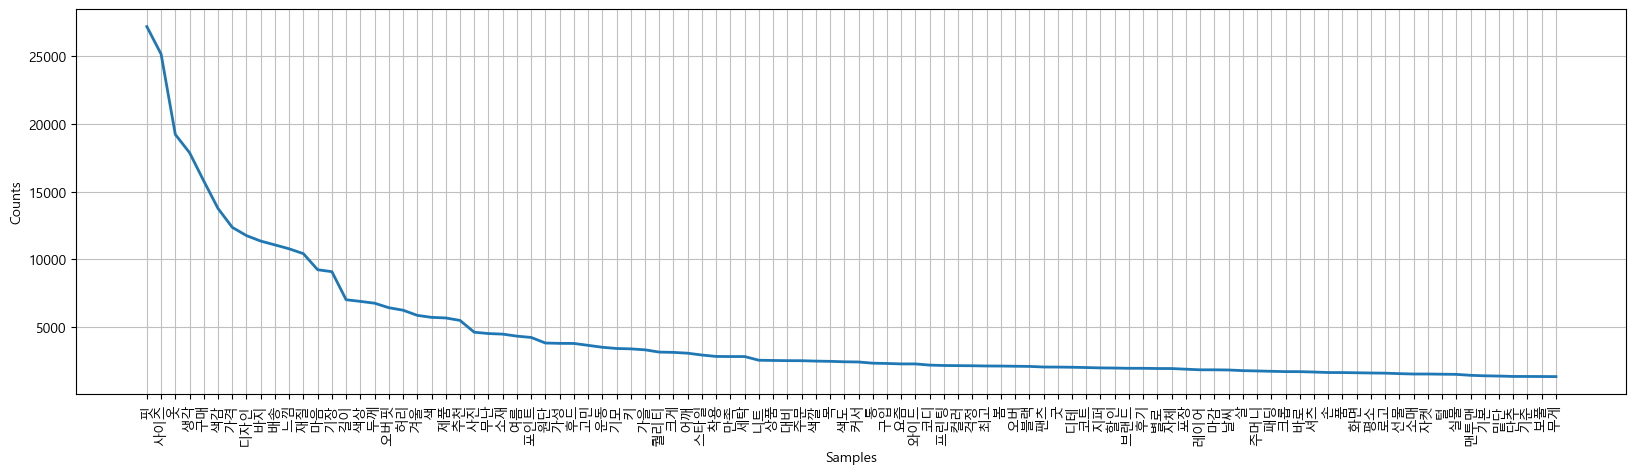

In [ ]:
plt.figure(figsize=(20, 5))
ko.plot(100)
plt.show()

In [ ]:
data_for_wc = ko.vocab().most_common(150)
dict(data_for_wc[:3])

{'Ìïè': 27162, 'ÏÇ¨Ïù¥Ï¶à': 25136, 'Ïò∑': 19212}

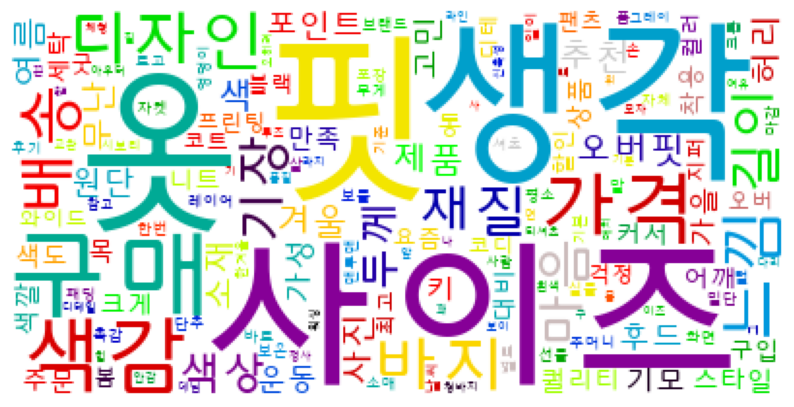

In [ ]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/HYKANM.TTF',
    relative_scaling=0.1,
    background_color='white',
    colormap='nipy_spectral'
).generate_from_frequencies(dict(data_for_wc))   #ÎπàÎèÑÏàò ÎîïÏÖîÎÑàÎ¶¨Î°ú ÎÑ£Í∏∞

plt.figure(figsize=(10, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()